In [3]:
import uproot4
import awkward as ak
import vector

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [5]:
data = uproot4.open('DoubleMuon_Run2015D_miniAOD2nanoAOD.root:miniaod2nanoaod')

In [6]:
data['Events'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HLT_IsoMu24_eta2p1   | bool                     | AsDtype('bool')
HLT_IsoMu24          | bool                     | AsDtype('bool')
HLT_IsoMu17_eta2p... | bool                     | AsDtype('bool')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | float[]                  | AsJagged(AsDtype('>f4'))
Muon_eta             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_phi             | float[]                  | AsJagged(AsDtype('>f4'))
Muon_mass            | float[]                  | AsJagged(AsDtype('>f4'))
Muon_charge          | int32_t[]                | AsJagged(AsDtype('>i4'))
Muon_

In [17]:
events = data['Events'].arrays(library="ak", how="zip")
ak.type(events)

334143 * {"run": int32, "luminosityBlock": uint32, "event": uint64, "HLT_IsoMu24_eta2p1": bool, "HLT_IsoMu24": bool, "HLT_IsoMu17_eta2p1_LooseIsoPFTau20": bool, "nMuon": uint32, "Muon": var * {"pt": float32, "eta": float32, "phi": float32, "mass": float32, "charge": int32, "pfRelIso03_all": float32, "pfRelIso04_all": float32, "tightId": bool, "softId": bool, "dxy": float32, "dxyErr": float32, "dz": float32, "dzErr": float32, "jetIdx": int32, "genPartIdx": int32}}

In [8]:
vector.register_awkward()

In [9]:
muons = ak.zip({
    "pt": events.Muon.pt,
    "eta": events.Muon.eta,
    "phi": events.Muon.phi,
    "mass": events.Muon.mass,
    "charge": events.Muon.charge
})

In [10]:
muon_pairs = ak.combinations(muons, 2)
mu1, mu2 = ak.unzip(muon_pairs)

In [25]:
listy = mu1.to_list()
listy[0:4]

[[{'pt': 32.664642333984375,
   'eta': -0.4782315790653229,
   'phi': -2.6924209594726562,
   'mass': 0.10570000112056732,
   'charge': 1}],
 [{'pt': 28.894447326660156,
   'eta': -1.5405164957046509,
   'phi': 0.48678985238075256,
   'mass': 0.10570000112056732,
   'charge': 1}],
 [{'pt': 29.105161666870117,
   'eta': 1.4080175161361694,
   'phi': 0.5874678492546082,
   'mass': 0.10565836727619171,
   'charge': -1}],
 [{'pt': 18.39596939086914,
   'eta': 1.8334213495254517,
   'phi': -1.6022955179214478,
   'mass': 0.10570000112056732,
   'charge': 1}]]

In [11]:
mumu_mass = np.sqrt(2*mu1.pt*mu2.pt*(np.cosh(mu1.eta - mu2.eta) - np.cos(mu1.phi - mu2.phi)))
mumu_mass = mumu_mass[mu1.charge != mu2.charge]

masses = ak.ravel(mumu_mass)

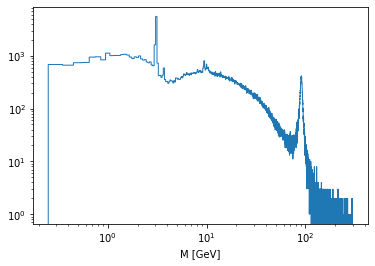

In [12]:
n,b,_ = plt.hist(
    masses, 
    histtype='step', 
    bins=3000, range=(0.25,300)
)

plt.xlabel('M [GeV]')
plt.xscale('log')
plt.yscale('log')

In [13]:
len(masses)

185653

In [14]:
df = ak.to_pandas(events)

/opt/anaconda3/lib/python3.9/site-packages/awkward/operations/convert.py:5265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  out = pandas.merge(out, df, how=how, left_index=True, right_index=True)


In [15]:
df.columns

Index([                               'run',
                          'luminosityBlock',
                                    'event',
                       'HLT_IsoMu24_eta2p1',
                              'HLT_IsoMu24',
       'HLT_IsoMu17_eta2p1_LooseIsoPFTau20',
                                    'nMuon',
                             ('Muon', 'pt'),
                            ('Muon', 'eta'),
                            ('Muon', 'phi'),
                           ('Muon', 'mass'),
                         ('Muon', 'charge'),
                 ('Muon', 'pfRelIso03_all'),
                 ('Muon', 'pfRelIso04_all'),
                        ('Muon', 'tightId'),
                         ('Muon', 'softId'),
                            ('Muon', 'dxy'),
                         ('Muon', 'dxyErr'),
                             ('Muon', 'dz'),
                          ('Muon', 'dzErr'),
                         ('Muon', 'jetIdx'),
                     ('Muon', 'genPartIdx')],
      dty

In [22]:
df.rename(
    columns={
        ("Muon", "pt"): "pt",
        ("Muon", "eta"): "eta",
        ("Muon", "phi"): "phi",
        ("Muon", "mass"): "mass",
        ("Muon", "charge"): "charge",
        ("Muon", "pfRelIso03_all"): "pfRelIso03_all",
        ("Muon", "pfRelIso04_all"): "pfRelIso04_all",
        ("Muon", "tightId"): "tightId",
        ("Muon", "softId"): "softId",
        ("Muon", "dxy"): "dxy", 
        ("Muon", "dxyErr"): "dxyErr",
        ("Muon", "dz"): "dz",
        ("Muon", "dzErr"): "dzErr",
        ("Muon", "jetIdx"): "jetIdx",
        ("Muon", "genPartIdx"): "genPartIdx"
    }, 
    inplace=True
)

In [23]:
df.drop(
    [
        'HLT_IsoMu24_eta2p1',
        'HLT_IsoMu24',
        'HLT_IsoMu17_eta2p1_LooseIsoPFTau20',
        'jetIdx',
        'genPartIdx',
    ], 
    inplace=True,
    axis=1,
)

In [24]:
df.head()

run  luminosityBlock       event  nMuon         pt  \
entry subentry                                                          
0     0         256676             1052  1433987112      2  32.664642   
      1         256676             1052  1433987112      2   4.815899   
1     0         256676             1052  1433999435      2  28.894447   
      1         256676             1052  1433999435      2  18.273682   
2     0         256676             1052  1433908571      2  29.105162   

                     eta       phi      mass  charge  pfRelIso03_all  \
entry subentry                                                         
0     0        -0.478232 -2.692421  0.105700       1        1.009496   
      1        -2.282161 -0.501225  0.105700      -1        1.191967   
1     0        -1.540516  0.486790  0.105700       1        1.482681   
      1         1.629738 -2.872056  0.105700       1        1.901988   
2     0         1.408018  0.587468  0.105658      -1     -999.000000   

                pfRelIso04_all  tightId  softId         dxy      dxyErr  \
entry subentry                                                            
0     0               1.030894     True    True    0.010427    0.001131   
      1               1.450307     True    True    0.028182    0.005242   
1     0               1.552032     True    True   -0.000464    0.001059   
      1               2.214382     True    True    0.001154    0.001371   
2     0            -999.000000    False   False -999.000000 -999.000000   

                        dz       dzErr  
entry subentry                          
0     0           0.006383    0.002373  
      1           0.025898    0.023694  
1     0           0.000408    0.003900  
      1          -0.018171    0.004747  
2     0        -999.000000 -999.000000

In [25]:
df.to_csv('DoubleMuon.csv')